In [33]:
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
df = pd.read_excel('team.xlsx') #可以读取网络文件

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    100 non-null    object
 1   team    100 non-null    object
 2   Q1      100 non-null    int64 
 3   Q2      100 non-null    int64 
 4   Q3      100 non-null    int64 
 5   Q4      100 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 4.8+ KB


In [36]:
df.describe()

,Q1,Q2,Q3,Q4
count,100.000000,100.000000,100.000000,100.000000
mean,49.200000,52.550000,52.670000,52.780000
std,29.962603,29.845181,26.543677,27.818524
min,1.000000,1.000000,1.000000,2.000000
25%,19.500000,26.750000,29.500000,29.500000
50%,51.500000,49.500000,55.000000,53.000000
75%,74.250000,77.750000,76.250000,75.250000
max,98.000000,99.000000,99.000000,99.000000


In [37]:
df.head()
df.sample(5)

,name,team,Q1,Q2,Q3,Q4
26,Teddy,E,71,91,21,48
51,Hugo0,A,28,25,14,71
4,Oah,D,65,49,61,86
79,Tyler,A,75,16,44,63
35,Samuel,B,9,38,88,66


In [38]:
df.axes

[RangeIndex(start=0, stop=100, step=1),
 Index(['name', 'team', 'Q1', 'Q2', 'Q3', 'Q4'], dtype='object')]

In [39]:
df.tail

<bound method NDFrame.tail of         name team  Q1  Q2  Q3  Q4
0      Liver    E  89  21  24  64
1       Arry    C  36  37  37  57
2        Ack    A  57  60  18  84
3      Eorge    C  93  96  71  78
4        Oah    D  65  49  61  86
..       ...  ...  ..  ..  ..  ..
95   Gabriel    C  48  59  87  74
96   Austin7    C  21  31  30  43
97  Lincoln4    C  98  93   1  20
98       Eli    E  11  74  58  91
99       Ben    E  21  43  41  74

[100 rows x 6 columns]>

In [40]:
# df.set_index(df['name'],inplace=True)   保留索引仍为一个序列
df.set_index('name',inplace=True)     #索引拆分出去，不再是表格内容一部分，可以用drop参数来实现上面方法的保留原列效果

In [41]:
df

,team,Q1,Q2,Q3,Q4
name,,,,,
Liver,E,89,21,24,64
Arry,C,36,37,37,57
Ack,A,57,60,18,84
Eorge,C,93,96,71,78
Oah,D,65,49,61,86
...,...,...,...,...,...
Gabriel,C,48,59,87,74
Austin7,C,21,31,30,43
Lincoln4,C,98,93,1,20


In [42]:
df['team']

name
Liver       E
Arry        C
Ack         A
Eorge       C
Oah         D
           ..
Gabriel     C
Austin7     C
Lincoln4    C
Eli         E
Ben         E
Name: team, Length: 100, dtype: object

In [43]:
df.loc[:,['Q1','Q2']]

,Q1,Q2
name,,
Liver,89,21
Arry,36,37
Ack,57,60
Eorge,93,96
Oah,65,49
...,...,...
Gabriel,48,59
Austin7,21,31
Lincoln4,98,93


行选择方法
利用索引
利用自然索引

In [44]:
df[df.index=='Eli']

,team,Q1,Q2,Q3,Q4
name,,,,,
Eli,E,11,74,58,91


In [45]:
df[2:20:2]

,team,Q1,Q2,Q3,Q4
name,,,,,
Ack,A,57,60,18,84
Oah,D,65,49,61,86
Acob,B,61,95,94,8
Reddie,D,64,93,57,72
Leo,B,17,4,33,79
Archie,C,83,89,59,68
Thomas,B,80,48,56,41
Joshua,A,63,4,80,30
William,C,80,68,3,26


In [46]:
df.iloc[2:8,:]

,team,Q1,Q2,Q3,Q4
name,,,,,
Ack,A,57,60,18,84
Eorge,C,93,96,71,78
Oah,D,65,49,61,86
Harlie,C,24,13,87,43
Acob,B,61,95,94,8
Lfie,A,9,10,99,37


In [47]:
df.loc[['Ack','Eorge','Harlie','Acob'],'team':'Q3']

,team,Q1,Q2,Q3
name,,,,
Ack,A,57,60,18
Eorge,C,93,96,71
Harlie,C,24,13,87
Acob,B,61,95,94


不连续区间如何选择？？？

In [48]:
#这种情况下，两种方式，用不用loc好像效果是一样的
df[df.Q1>80]
df.loc[df.Q1>80]

,team,Q1,Q2,Q3,Q4
name,,,,,
Liver,E,89,21,24,64
Eorge,C,93,96,71,78
Archie,C,83,89,59,68
Henry,A,91,15,75,17
Max,E,97,75,41,3
Harrison,B,89,13,18,75
Alexander,C,91,76,26,79
Adam,C,90,32,47,39
Jaxon,E,88,98,19,98


In [49]:
df.loc[(df.Q1>90) | (df.Q2<90)]  #各个条件都要加上小括号

,team,Q1,Q2,Q3,Q4
name,,,,,
Liver,E,89,21,24,64
Arry,C,36,37,37,57
Ack,A,57,60,18,84
Eorge,C,93,96,71,78
Oah,D,65,49,61,86
...,...,...,...,...,...
Gabriel,C,48,59,87,74
Austin7,C,21,31,30,43
Lincoln4,C,98,93,1,20


In [50]:
df[df['team']=='C'].loc[df.Q1>90]

,team,Q1,Q2,Q3,Q4
name,,,,,
Eorge,C,93,96,71,78
Alexander,C,91,76,26,79
Lincoln4,C,98,93,1,20


In [51]:
df[df.team=='C'].loc[df.Q1>90]

,team,Q1,Q2,Q3,Q4
name,,,,,
Eorge,C,93,96,71,78
Alexander,C,91,76,26,79
Lincoln4,C,98,93,1,20


排序

In [52]:
df.sort_values(by='Q1',ascending=True)

,team,Q1,Q2,Q3,Q4
name,,,,,
Sebastian,C,1,14,68,48
Harley,B,2,99,12,13
Liam,B,2,80,24,25
Lewis,B,4,34,77,28
Finn,E,4,1,55,32
...,...,...,...,...,...
Eorge,C,93,96,71,78
Aaron,A,96,75,55,8
Elijah,B,97,89,15,46


In [53]:
df.sort_values(by=['Q1','Q2'],ascending=[True,True])

,team,Q1,Q2,Q3,Q4
name,,,,,
Sebastian,C,1,14,68,48
Liam,B,2,80,24,25
Harley,B,2,99,12,13
Finn,E,4,1,55,32
Lewis,B,4,34,77,28
...,...,...,...,...,...
Eorge,C,93,96,71,78
Aaron,A,96,75,55,8
Max,E,97,75,41,3


In [54]:
df.Q1-df.Q2

name
Liver       68
Arry        -1
Ack         -3
Eorge       -3
Oah         16
            ..
Gabriel    -11
Austin7    -10
Lincoln4     5
Eli        -63
Ben        -22
Length: 100, dtype: int64

In [55]:
df['Q1']-df['Q3']

name
Liver       65
Arry        -1
Ack         39
Eorge       22
Oah          4
            ..
Gabriel    -39
Austin7     -9
Lincoln4    97
Eli        -47
Ben        -20
Length: 100, dtype: int64

In [56]:
df.sort_index(axis='index')

,team,Q1,Q2,Q3,Q4
name,,,,,
Aaron,A,96,75,55,8
Ack,A,57,60,18,84
Acob,B,61,95,94,8
Adam,C,90,32,47,39
Aiden,D,20,31,62,68
...,...,...,...,...,...
Toby,A,52,27,17,68
Tommy,C,29,44,28,76
Tyler,A,75,16,44,63


In [57]:
df2 = df.sort_index(0)

/tmp/ipykernel_5371/481987914.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  df2 = df.sort_index(0)


In [58]:
df2

,team,Q1,Q2,Q3,Q4
name,,,,,
Aaron,A,96,75,55,8
Ack,A,57,60,18,84
Acob,B,61,95,94,8
Adam,C,90,32,47,39
Aiden,D,20,31,62,68
...,...,...,...,...,...
Toby,A,52,27,17,68
Tommy,C,29,44,28,76
Tyler,A,75,16,44,63


In [59]:
df.sort_index('index',inplace=True)

/tmp/ipykernel_5371/1451907874.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  df.sort_index('index',inplace=True)


In [60]:
df

,team,Q1,Q2,Q3,Q4
name,,,,,
Aaron,A,96,75,55,8
Ack,A,57,60,18,84
Acob,B,61,95,94,8
Adam,C,90,32,47,39
Aiden,D,20,31,62,68
...,...,...,...,...,...
Toby,A,52,27,17,68
Tommy,C,29,44,28,76
Tyler,A,75,16,44,63


In [61]:
df.sort_index('columns')

/tmp/ipykernel_5371/4002987897.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  df.sort_index('columns')


,Q1,Q2,Q3,Q4,team
name,,,,,
Aaron,96,75,55,8,A
Ack,57,60,18,84,A
Acob,61,95,94,8,B
Adam,90,32,47,39,C
Aiden,20,31,62,68,D
...,...,...,...,...,...
Toby,52,27,17,68,A
Tommy,29,44,28,76,C
Tyler,75,16,44,63,A


In [62]:
分组聚合

NameError: name '分组聚合' is not defined

In [ ]:
df.groupby('team')

In [ ]:
df.groupby('team').sum()

,Q1,Q2,Q3,Q4
team,,,,
A,1066,639,875,783
B,975,1218,1202,1136
C,1056,1194,1068,1127
D,860,1191,1241,1199
E,963,1013,881,1033


In [ ]:
df.groupby('team').mean()

,Q1,Q2,Q3,Q4
team,,,,
A,62.705882,37.588235,51.470588,46.058824
B,44.318182,55.363636,54.636364,51.636364
C,48.000000,54.272727,48.545455,51.227273
D,45.263158,62.684211,65.315789,63.105263
E,48.150000,50.650000,44.050000,51.650000


In [ ]:
df.groupby('team').agg({'Q1':sum,
'Q2':'count','Q3':max,'Q4':'mean'})  #为何有的需要加引号，有的不需要？？？

,Q1,Q2,Q3,Q4
team,,,,
A,1066,17,99,46.058824
B,975,22,99,51.636364
C,1056,22,87,51.227273
D,860,19,95,63.105263
E,963,20,87,51.650000


In [ ]:
df.groupby('team').sum().T

team,A,B,C,D,E
Q1,1066,975,1056,860,963
Q2,639,1218,1194,1191,1013
Q3,875,1202,1068,1241,881
Q4,783,1136,1127,1199,1033


In [ ]:
df.groupby('team').sum().stack()

team    
A     Q1    1066
      Q2     639
      Q3     875
      Q4     783
B     Q1     975
      Q2    1218
      Q3    1202
      Q4    1136
C     Q1    1056
      Q2    1194
      Q3    1068
      Q4    1127
D     Q1     860
      Q2    1191
      Q3    1241
      Q4    1199
E     Q1     963
      Q2    1013
      Q3     881
      Q4    1033
dtype: int64

In [ ]:
df.groupby('team').sum().unstack()

    team
Q1  A       1066
    B        975
    C       1056
    D        860
    E        963
Q2  A        639
    B       1218
    C       1194
    D       1191
    E       1013
Q3  A        875
    B       1202
    C       1068
    D       1241
    E        881
Q4  A        783
    B       1136
    C       1127
    D       1199
    E       1033
dtype: int64

In [ ]:
df['one']=1

In [ ]:
df

,team,Q1,Q2,Q3,Q4,one
name,,,,,,
Aaron,A,96,75,55,8,1
Ack,A,57,60,18,84,1
Acob,B,61,95,94,8,1
Adam,C,90,32,47,39,1
Aiden,D,20,31,62,68,1
...,...,...,...,...,...,...
Toby,A,52,27,17,68,1
Tommy,C,29,44,28,76,1
Tyler,A,75,16,44,63,1


In [ ]:
df.two=2  #以.的形式无法创建,只能肜来修改

In [ ]:
df

,team,Q1,Q2,Q3,Q4,one
name,,,,,,
Aaron,A,96,75,55,8,1
Ack,A,57,60,18,84,1
Acob,B,61,95,94,8,1
Adam,C,90,32,47,39,1
Aiden,D,20,31,62,68,1
...,...,...,...,...,...,...
Toby,A,52,27,17,68,1
Tommy,C,29,44,28,76,1
Tyler,A,75,16,44,63,1


In [ ]:
df.one=2
df

,team,Q1,Q2,Q3,Q4,one
name,,,,,,
Aaron,A,96,75,55,8,2
Ack,A,57,60,18,84,2
Acob,B,61,95,94,8,2
Adam,C,90,32,47,39,2
Aiden,D,20,31,62,68,2
...,...,...,...,...,...,...
Toby,A,52,27,17,68,2
Tommy,C,29,44,28,76,2
Tyler,A,75,16,44,63,2


In [ ]:
df['two']=2
df

,team,Q1,Q2,Q3,Q4,one,two
name,,,,,,,
Aaron,A,96,75,55,8,2,2
Ack,A,57,60,18,84,2,2
Acob,B,61,95,94,8,2,2
Adam,C,90,32,47,39,2,2
Aiden,D,20,31,62,68,2,2
...,...,...,...,...,...,...,...
Toby,A,52,27,17,68,2,2
Tommy,C,29,44,28,76,2,2
Tyler,A,75,16,44,63,2,2


In [ ]:
df['total']=df.Q1+df.Q2+df.Q3+df.Q4
df

,team,Q1,Q2,Q3,Q4,one,two,total
name,,,,,,,,
Aaron,A,96,75,55,8,2,2,234
Ack,A,57,60,18,84,2,2,219
Acob,B,61,95,94,8,2,2,258
Adam,C,90,32,47,39,2,2,208
Aiden,D,20,31,62,68,2,2,181
...,...,...,...,...,...,...,...,...
Toby,A,52,27,17,68,2,2,164
Tommy,C,29,44,28,76,2,2,177
Tyler,A,75,16,44,63,2,2,198


In [ ]:
df.two='2' #即使是加了引号，还是会被当作整数处理

,team,Q1,Q2,Q3,Q4,one,two,total
name,,,,,,,,
Aaron,A,96,75,55,8,2,2,234
Ack,A,57,60,18,84,2,2,219
Acob,B,61,95,94,8,2,2,258
Adam,C,90,32,47,39,2,2,208
Aiden,D,20,31,62,68,2,2,181
...,...,...,...,...,...,...,...,...
Toby,A,52,27,17,68,2,2,164
Tommy,C,29,44,28,76,2,2,177
Tyler,A,75,16,44,63,2,2,198


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, Aaron to Zachary
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   team    100 non-null    object
 1   Q1      100 non-null    int64 
 2   Q2      100 non-null    int64 
 3   Q3      100 non-null    int64 
 4   Q4      100 non-null    int64 
 5   one     100 non-null    int64 
 6   two     100 non-null    int64 
 7   total   100 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 7.0+ KB


统计函数

In [ ]:
# std,mean,median,mode,var,max,count,sum,

内置了绘图matplotlib

<AxesSubplot:xlabel='name'>

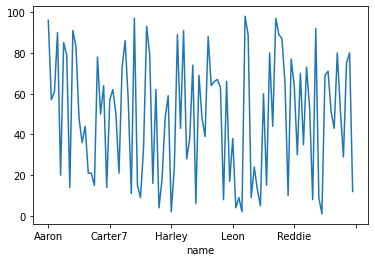

In [ ]:
df['Q1'].plot()

<AxesSubplot:>

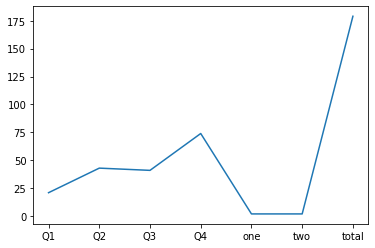

In [ ]:
df.loc['Ben','Q1':'total'].plot()

<AxesSubplot:>

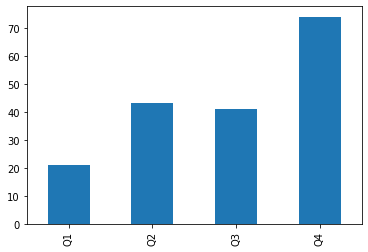

In [ ]:
df.loc['Ben','Q1':'Q4'].plot.bar()

<AxesSubplot:>

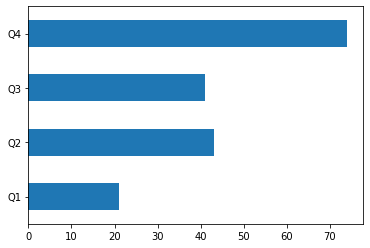

In [ ]:
df.loc['Ben','Q1':'Q4'].plot.barh()

<AxesSubplot:xlabel='team'>

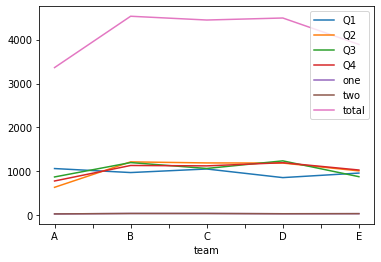

In [ ]:
df.groupby('team').sum().plot()

<AxesSubplot:>

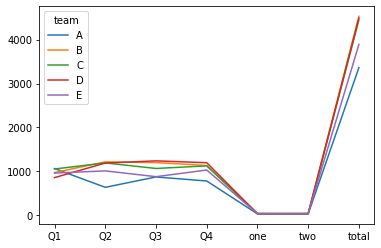

In [ ]:
df.groupby('team').sum().T.plot()

<AxesSubplot:ylabel='Q1'>

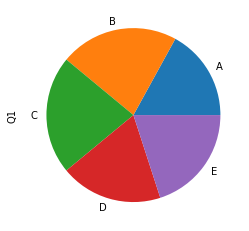

In [ ]:
df.groupby('team').count().Q1.plot.pie()

In [ ]:
df.groupby('team').count().plot.pie()

ValueError: pie requires either y column or 'subplots=True'

array([<AxesSubplot:ylabel='Q1'>, <AxesSubplot:ylabel='Q2'>,
       <AxesSubplot:ylabel='Q3'>, <AxesSubplot:ylabel='Q4'>,
       <AxesSubplot:ylabel='one'>, <AxesSubplot:ylabel='two'>,
       <AxesSubplot:ylabel='total'>], dtype=object)

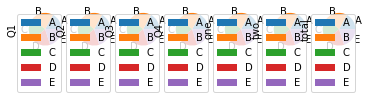

In [ ]:
df.groupby('team').count().plot.pie(subplots=True)

array([<AxesSubplot:ylabel='Q1'>, <AxesSubplot:ylabel='Q3'>], dtype=object)

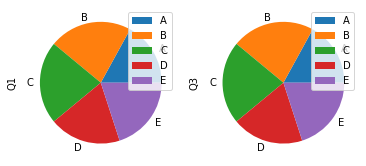

In [ ]:
df.groupby('team').count()[['Q1','Q3']].plot.pie(subplots=True)  #指定其中的列要双重中括号

In [ ]:
df.to_excel('new_team.xlsx')

In [63]:
df.to_csv('new_team.csv')

In [64]:
df

,team,Q1,Q2,Q3,Q4
name,,,,,
Aaron,A,96,75,55,8
Ack,A,57,60,18,84
Acob,B,61,95,94,8
Adam,C,90,32,47,39
Aiden,D,20,31,62,68
...,...,...,...,...,...
Toby,A,52,27,17,68
Tommy,C,29,44,28,76
Tyler,A,75,16,44,63


In [67]:
df.reset_index(inplace=True)

In [69]:
df.set_index(['name','team'])

,,Q1,Q2,Q3,Q4
name,team,,,,
Aaron,A,96,75,55,8
Ack,A,57,60,18,84
Acob,B,61,95,94,8
Adam,C,90,32,47,39
Aiden,D,20,31,62,68
...,...,...,...,...,...
Toby,A,52,27,17,68
Tommy,C,29,44,28,76
Tyler,A,75,16,44,63


In [71]:
df.set_index(['team','name'])

Q1  Q2  Q3  Q4
team name                   
A    Aaron    96  75  55   8
     Ack      57  60  18  84
B    Acob     61  95  94   8
C    Adam     90  32  47  39
D    Aiden    20  31  62  68
...           ..  ..  ..  ..
A    Toby     52  27  17  68
C    Tommy    29  44  28  76
A    Tyler    75  16  44  63
C    William  80  68   3  26
E    Zachary  12  71  85  93

[100 rows x 4 columns]